In [73]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [74]:
# http://etienned.github.io/posts/extract-text-from-word-docx-simply/

try:
    from xml.etree.cElementTree import XML
except ImportError:
    from xml.etree.ElementTree import XML
import zipfile
import os


"""
Module that extract text from MS XML Word document (.docx).
(Inspired by python-docx <https://github.com/mikemaccana/python-docx>)
"""

WORD_NAMESPACE = '{http://schemas.openxmlformats.org/wordprocessingml/2006/main}'
PARA = WORD_NAMESPACE + 'p'
TEXT = WORD_NAMESPACE + 't'


def get_docx_text(path):
    """
    Take the path of a docx file as argument, return the text in unicode.
    """
    document = zipfile.ZipFile(path)
    xml_content = document.read('word/document.xml')
    document.close()
    tree = XML(xml_content)

    paragraphs = []
    for paragraph in tree.getiterator(PARA):
        texts = [node.text
                 for node in paragraph.getiterator(TEXT)
                 if node.text]
        if texts:
            paragraphs.append(''.join(texts))

    return '\n\n'.join(paragraphs)

def doc_to_txt(root_dir, outpath):
    ''' convert all pdfs in root_dir to text including sub dirs
    '''
    # First open the outpath
    with open(outpath, 'w') as outf:
        # Now walk the files
        for root, _, files in os.walk(root_dir):
            for f in files:
                _, ext = os.path.splitext(f)
                if ext == '.doc' or ext == '.docx':
                    json.dump({'name': f, 'content': get_docx_text(os.path.join(root, f))}, outf)
                    outf.write('\n')
                    
doc_to_txt('c:\\tools\\code\\ResumeAnalytics\\Other Resumes', 'other2.jsonl')

In [76]:
from dirtojsonl import process_directory

process_directory('c:\\tools\\code\\ResumeAnalytics\\Candidate Resumes', 'candidate.jsonl')
process_directory('c:\\tools\\code\\ResumeAnalytics\\Target Resumes', 'target.jsonl')
process_directory('c:\\tools\\code\\ResumeAnalytics\\Other Resumes', 'other.jsonl')

import json
with open('candidate.jsonl', 'r') as cf, open('target.jsonl', 'r') as tf, open('other.jsonl', 'r') as of:
  candidate = [json.loads(line) for line in cf]
  target = [json.loads(line) for line in tf]
  other = [json.loads(line) for line in of]
    
mashed_target = ''
doc_set = []
other_set = []
for t in target:
  doc_set.append(t['content'])
for o in other:
  other_set.append(o['content'])

can_set = []
for c in candidate:
  can_set.append(c['content'])


In [77]:

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# Do it again for other list
for i in other_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes=20)

In [78]:
print (ldamodel.print_topics(num_topics = 20, num_words = 4))

[(0, '0.000*develop + 0.000*system + 0.000*manag + 0.000*test'), (1, '0.012*review + 0.011*hamilton + 0.011*document + 0.011*booz'), (2, '0.000*manag + 0.000*use + 0.000*engin + 0.000*system'), (3, '0.017*support + 0.015*manag + 0.011*data + 0.011*test'), (4, '0.017*project + 0.013*develop + 0.010*app + 0.009*applic'), (5, '0.020*yr + 0.015*develop + 0.014*manag + 0.013*project'), (6, '0.000*manag + 0.000*system + 0.000*data + 0.000*support'), (7, '0.000*vaibhaw + 0.000*2013 + 0.000*kumar + 0.000*use'), (8, '0.000*data + 0.000*2013 + 0.000*kumar + 0.000*support'), (9, '0.030*2014 + 0.015*po + 0.015*group + 0.015*benefit'), (10, '0.000*use + 0.000*yr + 0.000*1 + 0.000*c'), (11, '0.000*risk + 0.000*lead + 0.000*manag + 0.000*dndo'), (12, '0.013*test + 0.011*use + 0.011*year + 0.011*applic'), (13, '0.029*system + 0.028*develop + 0.024*server + 0.020*microsoft'), (14, '0.000*test + 0.000*changoor + 0.000*applic + 0.000*softwar'), (15, '0.000*manag + 0.000*support + 0.000*risk + 0.000*analy

In [79]:
import numpy

print (">>>>Target:<<<<\n")
target_topics = []
for i in target:
    raw = i['content'].lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    print (i['name'])
    topics = ldamodel.get_document_topics(dictionary.doc2bow(stemmed_tokens))
    print (topics)
    for topic in topics:
        target_topics = numpy.append(target_topics, topic[0])
    target_topics = unique(target_topics)
    print (target_topics)
    
    
print ("\n\n>>>>Other:<<<<\n")
for i in other:
    raw = i['content'].lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    print (i['name'])
    print (ldamodel.get_document_topics(dictionary.doc2bow(stemmed_tokens)))    
    
print ("\n\n>>>>Candidates:<<<<\n")

for i in candidate:
    raw = i['content'].lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    i['distance'] = 0
    for topic in ldamodel.get_document_topics(dictionary.doc2bow(stemmed_tokens)):
        if (topic[0] in target_topics):
            i['distance'] = i['distance'] + topic[1]
    print (i['name'] + ": " + str(i['distance']))
    print (ldamodel.get_document_topics(dictionary.doc2bow(stemmed_tokens)))



>>>>Target:<<<<

Brandon Herzog Resume 2010.txt
[(12, 0.99666666665195158)]
[ 12.]
DrewChenResume.txt
[(4, 0.99654545452872612)]
[  4.  12.]
Kyle Shaw Resume 2016.txt
[(4, 0.99872654153774698)]
[  4.  12.]
Resume_Alejandro_Hired.txt
[(12, 0.99295008575020893)]
[  4.  12.]
ToddOldResume.txt
[(12, 0.99543269223532105)]
[  4.  12.]


>>>>Other:<<<<

547820.txt
[(3, 0.84033213148531971), (5, 0.15755022144320749)]
551854.txt
[(12, 0.99812252963552739)]
558202.txt
[(12, 0.99657039709806972)]
567324.txt
[(5, 0.99727793695121447)]
570462.txt
[(3, 0.9981150793550333)]
570627.txt
[(3, 0.99861918604062694)]
579014.txt
[(1, 0.99797872336264182)]
Resume_ChristopherWAnderson_20150411.txt
[(12, 0.99861516034444042)]
resume_vkumar_data_science.txt
[(3, 0.99881840795633525)]
Todd Powell.txt
[(13, 0.99592341996875888)]
571023.docx
[(1, 0.9940790742369594)]
571221.docx
[(12, 0.99680134678494547)]
571786.docx
[(3, 0.99861111110515299)]
577053.docx
[(9, 0.68240180731353406), (13, 0.31352579448314294)]
Sean

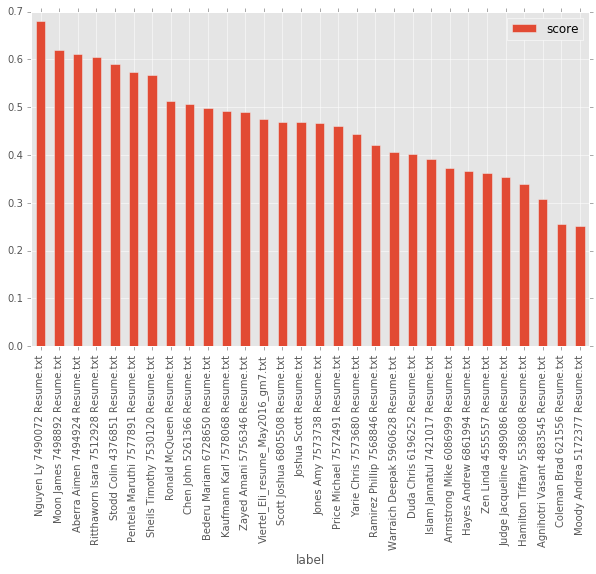

In [80]:
%matplotlib inline
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

result = []
for i in range(len(candidate)):
    result.append((candidate[i]['name'], candidate[i]['distance']))
result = sorted(result, key=lambda x: x[1], reverse=True)

df = pd.DataFrame(result, columns=['label', 'score'])
df[:50].plot(kind='bar', x='label', y='score');